In [1]:
# --- a. Import the necessary packages ---

import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(filepath, num_classes=10):

    # 1. Load the dataset
    print(f"Loading data from: {filepath}...")
    data = pd.read_csv(filepath)

    # 2. Separate features (pixels) and target (label)
    X = data.iloc[:, 1:].values.astype('float32') # Pixel data starts from the second column
    y = data['label'].values

    # 3. Normalise the pixel data: Scale to the range [0, 1]
    # MNIST pixels are 0 to 255 (unsigned 8-bit integers)
    X /= 255.0

    # 4. One-hot encode the target labels (e.g., 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    y = to_categorical(y, num_classes=num_classes)

    return X, y


In [3]:
# --- b. Load the training and testing data ---

X_train, y_train = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_train.csv")
X_test, y_test = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_test.csv")

Loading data from: C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_train.csv...
Loading data from: C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_test.csv...


In [13]:


# --- c. Define the network architecture using Keras ---

# The MNIST image is 28x28 = 784 pixels.
# The Sequential model defines a linear stack of layers.

model = Sequential([
    # Input layer: Flattens the 784-element feature vector
    Flatten(input_shape=(784,)),

    # First Hidden Layer: A fully-connected layer with 512 neurons and ReLU activation
    Dense(512, activation='relu', name='Hidden_Layer_1'),

    # Second Hidden Layer: A fully-connected layer with 256 neurons and ReLU activation
    Dense(256, activation='relu', name='Hidden_Layer_2'),

    # Output Layer: 10 neurons (for digits 0-9) and Softmax for classification probability
    Dense(10, activation='softmax', name='Output_Layer')
])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
# We use categorical crossentropy because the labels are one-hot encoded

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# --- d. Train the model using SGD with 11 epochs ---

print("\nStarting model training...")
H = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=11,  # Train for 11 epochs as requested
    batch_size=128,
    verbose=1
)
print("Model training complete.")


Starting model training...
Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7634 - loss: 1.0854 - val_accuracy: 0.8808 - val_loss: 0.5117
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8865 - loss: 0.4420 - val_accuracy: 0.9031 - val_loss: 0.3644
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9028 - loss: 0.3548 - val_accuracy: 0.9130 - val_loss: 0.3161
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9119 - loss: 0.3154 - val_accuracy: 0.9203 - val_loss: 0.2876
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9182 - loss: 0.2898 - val_accuracy: 0.9262 - val_loss: 0.2670
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9234 - loss: 0.2703 - val_accuracy: 0.9308 - val_loss: 0.2503
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9282 - loss: 0.2542 - val_accuracy: 0.9333 - val_loss: 0.2382
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9317 - los

In [16]:
# --- e. Evaluate the network ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.1993
Test Accuracy: 94.28%


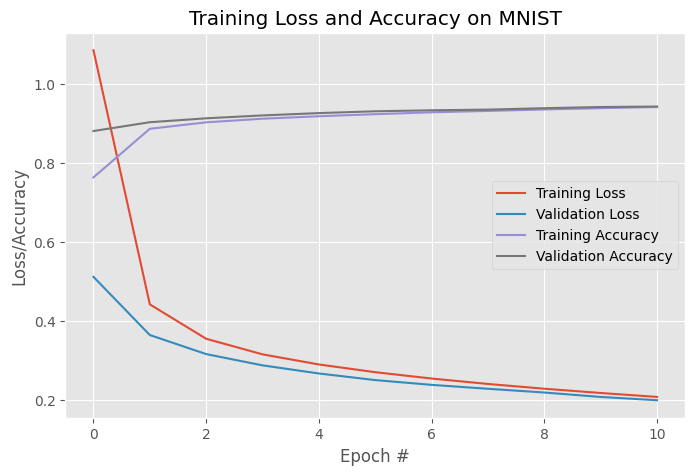

In [18]:
# --- f. Plot the training loss and accuracy ---

plt.style.use("ggplot")
plt.figure(figsize = (8, 5))

plt.plot(np.arange(0, 11), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, 11), H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, 11), H.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, 11), H.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training Loss and Accuracy on MNIST")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


def load_and_process_data(filepath, num_classes = 10):
    data = pd.read_csv(filepath)
    X = data.iloc[:, 1:].values.astype('float32')
    y = data['label'].values
    X = X / 255.0
    y = to_categorical(y, num_classes = num_classes)
    return X, y

X_train, y_train = load_and_process_data(r"C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_train.csv")
X_test, y_test = load_and_process_data(r"C:\Users\hp\OneDrive\Desktop\LP4\MNIST\MNIST_Ass2_and_Ass3\mnist_test.csv")

model = Sequential()
model.add(Flatten(input_shape = (784,), name = "Input_Layer"))
model.add(Dense(512, activation = "relu", name = "Hidden_Layer1"))
model.add(Dense(256, activation = "relu", name = "Hidden_Layer2"))
model.add(Dense(10, activation = "softmax", name = "Hidden_Layer3"))

sgd = SGD(0.01)
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

epochs = 11
H = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 128)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.2f}")

plt.style.use("ggplot")
plt.figure(figsize = (8, 5))

plt.plot(np.arange(0, epochs), H.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, epochs), H.history['val_loss'], label = "Value Loss")
plt.plot(np.arange(0, epochs), H.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = "Accuracy_Loss")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss adn Accuracy")
plt.legend()
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7526 - loss: 1.0737 - val_accuracy: 0.8783 - val_loss: 0.5141
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8832 - loss: 0.4445 - val_accuracy: 0.9023 - val_loss: 0.3632
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9018 - loss: 0.3549 - val_accuracy: 0.9123 - val_loss: 0.3160
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9115 - loss: 0.3145 - val_accuracy: 0.9197 - val_loss: 0.2856
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - loss: 0.2883 - val_accuracy: 0.9253 - val_loss: 0.2645
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9243 - loss: 0.2685 - val_accuracy: 0.9285 - val_loss: 0.2500
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9290 - loss: 0.2525 - val_accuracy: 0.9343 - val_loss: 0.2372
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9324 - loss: 0.2388 - val_accuracy: 0.

In [3]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.1997
Accuracy: 94.38%
Loss: 0.20


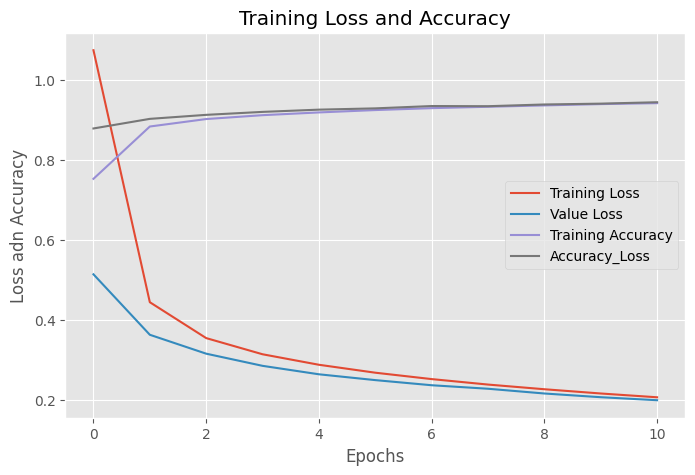

In [13]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 5))

plt.plot(np.arange(0, epochs), H.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, epochs), H.history['val_loss'], label = "Value Loss")
plt.plot(np.arange(0, epochs), H.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = "Accuracy_Loss")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss adn Accuracy")
plt.legend()
plt.show()
